# B71 bone vibrator maximal hearing level output and vibrotactile thresholds (Jansson et al., 2015 & 2017).

Guido Cattani, 15-01-2023

In [1]:
import numpy as np
import pandas as pd

In [2]:
import matplotlib
import matplotlib.pyplot as plt
import seaborn as sns

In [3]:
def read_data_max(fin="/media/guido/LACIE/Beengeleiding/Max_output_Jansson_B81&B71.csv"):
    # read input file, clean and mung data
    df = pd.read_csv(fin)
    df.set_index('Unnamed: 0', drop=True, inplace=True)
    df.index.names = ['Data_type']
    return df

In [4]:
def read_data_VBT(fin="/media/guido/LACIE/Beengeleiding/B71_vibrotactile_thresholds.csv"):
    # read input file, clean and mung data
    df = pd.read_csv(fin)
    df = df.drop(['Unnamed: 0', 'Unnamed: 1', 'Unnamed: 2'], axis = 1)   # Deleate 2 columns
    df = df.drop([0, 2, 3], axis = 0)                 # Deleate a blanc row
    new = {0:'125', 1:'250', 2:'500', 3:'750', 4:'1000', 5:'1500', 6:'2000'}
    vbt = df[['VBT_125', 'VBT_250', 'VBT_500', 'VBT_750', 'VBT_1000', 'VBT_1500', 'VBT_2000']].T
    vbt.reset_index(drop=True, inplace=True)
    vbt.rename(new, inplace=True)
    vbt.rename(columns={1:'Mean_Vibrotactile_Thresholds_B71'}, inplace=True)
    sd = df[['SD_125', 'SD_250', 'SD_500', 'SD_750', 'SD_1000', 'SD_1500', 'SD_2000']].T
    sd.reset_index(drop=True, inplace=True)
    sd.rename(new, inplace=True)
    sd.rename(columns={1:'SD_Vibrotactile_Thresholds_B71'}, inplace=True)
    df1 = pd.concat([vbt, sd], axis=1).T
    return df1

In [5]:
def munging_data():
    vbt = read_data_VBT()
    max_out = read_data_max()
    df = pd.concat([max_out, vbt])
    df.drop(['Max_hl_B81', 'SD_max_hl_B81'], inplace=True)
    c125 = df.pop('125')
    df = pd.concat([c125, df], axis=1)
    return df

In [6]:
def splitting_data():
    # input max_otput data, 
    # output is df with f as index and as colums tuples (max_otput, sd) for B81 & B71
    df = munging_data()
    l = list()                                         # empty list
    st = pd.Series(dtype = 'float')                    # empty series
    df1 = pd.DataFrame()                               # empty dataframe
    for i in df.index:                                 # separate data lines
        s = df.loc[i]                                    
        l.append(s)                                    # make list of data lines 
    for j in range(0, len(l), 2):
        smo = l[j]                                     # series with ouput data
        ssd = l[j+1]                                   # series with sd data
        for f in smo.index:                            # freq. recursor
            t = (smo[f], ssd[f])                       # make a tuple with max output & sd
            st.at[f] = t                               # create a series of tuples
            st.name = smo.name                         # series name = name data line
        df1 = pd.concat([df1, st], axis = 1)           # all frequencies
    return df1

In [7]:
def make_distribution():
    # this function create a long dataframe
    df = splitting_data()
    df1 = pd.DataFrame()                               # empty dataframe
    col_names = list(df.columns)
    for vibrator_name in col_names:
        s = df[vibrator_name]                          # separate data rows
        l = list()                                     # empty list
        distributions = create_arrays(s)               # df with all freq. distributions
        for i in range(len(distributions)): l.append(vibrator_name)# add data/vibrator name
        svn = pd.Series(l, name = 'data_name')
        df2 = pd.concat([svn, distributions], axis = 1)
        df1 = pd.concat([df1, df2])                    # B81 & B71 together
    
    # from wide to long: unpivot data
    df1 = pd.melt(df1, id_vars = 'data_name', var_name='Frequency [Hz]', 
                        value_name='Hearing Levels [dBHL]', 
                        col_level=None, ignore_index=True)
    return df1

In [8]:
def create_arrays(s):
    # function to create per frequency a distribution n=10000 with average and SD from data
    df = pd.DataFrame(dtype = 'float')
    for f in s.index: 
        avrg, st_dev = (s[f])
        distribution = np.random.normal(loc=avrg,scale=st_dev,size=10000)
        line = pd.Series(distribution, dtype = 'float', name = f)
        df = pd.concat([df, line], axis = 1)
    return df

In [9]:
def show_scatter():
    df = make_distribution() # plot input data
    
    # make a scatterplot
    sns.set_style("whitegrid")

    ax = sns.pointplot(data=df, x=df['Frequency [Hz]'], 
                       y=df['Hearing Levels [dBHL]'], hue=df['data_name'], 
                       estimator='mean', errorbar='sd', dodge=0.2, join=True,
                       palette='colorblind') 

    plt.ylim(reversed(plt.ylim(0, 100))) # reverse y as
    ax.xaxis.set_ticks_position('top')   # place x axes on top
    ax.xaxis.set_label_position('top')   # place x label on top
    plt.grid(visible=True, which='major', axis='both') # add horizon. & vertical rasters

    # place legend outside plot top right corner
    plt.legend(bbox_to_anchor=(1.02, 1), loc='upper left', borderaxespad=0)

    plt.savefig("/media/guido/LACIE/Beengeleiding/b71_max_&_vbt.png", 
                dpi=300, bbox_inches = "tight")
    plt.show()

In [10]:
def execution():
    data = munging_data()
    show_scatter()
    return data

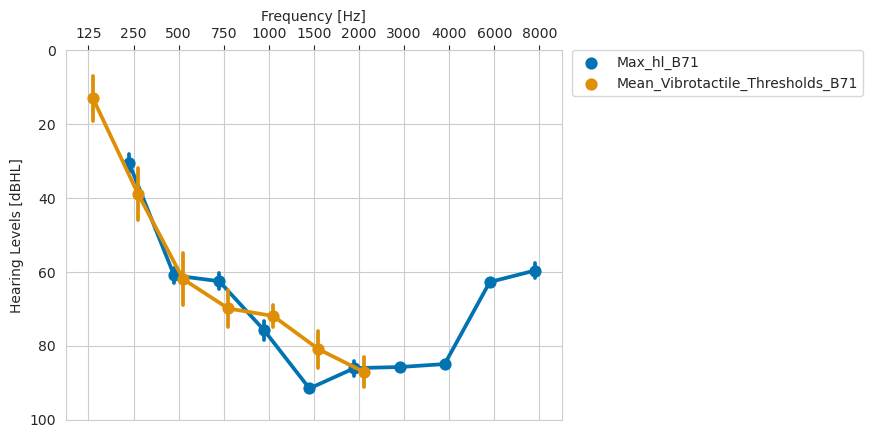

,125,250,500,750,1000,1500,2000,3000,4000,6000,8000
Max_hl_B71,NaN,30.6,61.0,62.6,75.9,91.6,86.1,85.8,85.0,62.8,59.7
SD_max_hl_B71,NaN,2.5,2.0,2.2,2.6,1.0,2.0,0.6,0.5,0.7,2.0
Mean_Vibrotactile_Thresholds_B71,13.0,39.0,62.0,70.0,72.0,81.0,87.0,NaN,NaN,NaN,NaN
SD_Vibrotactile_Thresholds_B71,6.0,7.0,7.0,5.0,3.0,5.0,4.0,NaN,NaN,NaN,NaN


In [11]:
execution()

Data are taken from:

Karl-Johan Fredén Jansson, Bo Håkansson, Leif Johannsen & Tomas Tengstrand (2015) 
Electro-acoustic performance of the new bone vibrator Radioear B81: 
A comparison with the conventional Radioear B71, 
International Journal of Audiology, 54:5, 334-340, 
DOI: 10.3109/14992027.2014.980521

Fredén Jansson, K. J., Håkansson, B., Reinfeldt, S., Fröhlich, L., & Rahne, T. (2017). Vibrotactile Thresholds on the Mastoid and Forehead Position of Deaf Patients Using Radioear B71 and B81. Ear and hearing, 38(6), 714–723. https://doi.org/10.1097/AUD.0000000000000456
